# แบบฝึกหัดเขียนโปรแกรมครั้งที่ 5 
## Linear Model Selection and Regularization

## 2.เขียนโปรแกรมแสดงความสัมพันธ์ระหว่าง complexity ของ model และ etrain, etest ของ ridge regression (Lecture หน้าที่ 44)

### Step 1: Importing Libraries

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Step 2: Generating Synthetic Data

In [227]:
# Build Train data
x = np.array([0, 0.095, 0.18, 0.3, 0.45, 0.55, 0.68, 0.78, 0.89, 1])
y = np.array([0.4, 0.8, 1, 0.97, 0.05, 0.09, -0.89, -0.5, -0.64, 0.2])

# Generate Test data
data_n = 10
x_test = np.linspace(0, 1, data_n)
y_test = np.sin(2 * np.pi * x_test) + np.random.randn(data_n) * 0.25

In [228]:
# # Generate 100 data points with random x-values between 0 and 1
# x = np.random.rand(100)
# # Simulate some non-linear relationship between x and y with noise
# y = np.sin(2*np.pi*x) + np.random.randn(100) * 0.2  # Add random noise

# # Generate Test data
# x_test = np.random.rand(100)
# y_test = np.sin(2*np.pi*x_test) + np.random.randn(100) * 0.3

### Step 3: Plotting Model Predictions

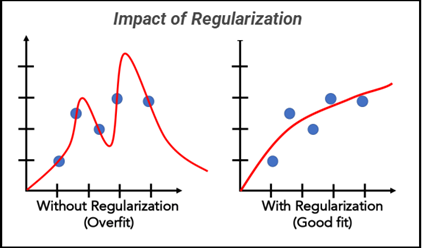

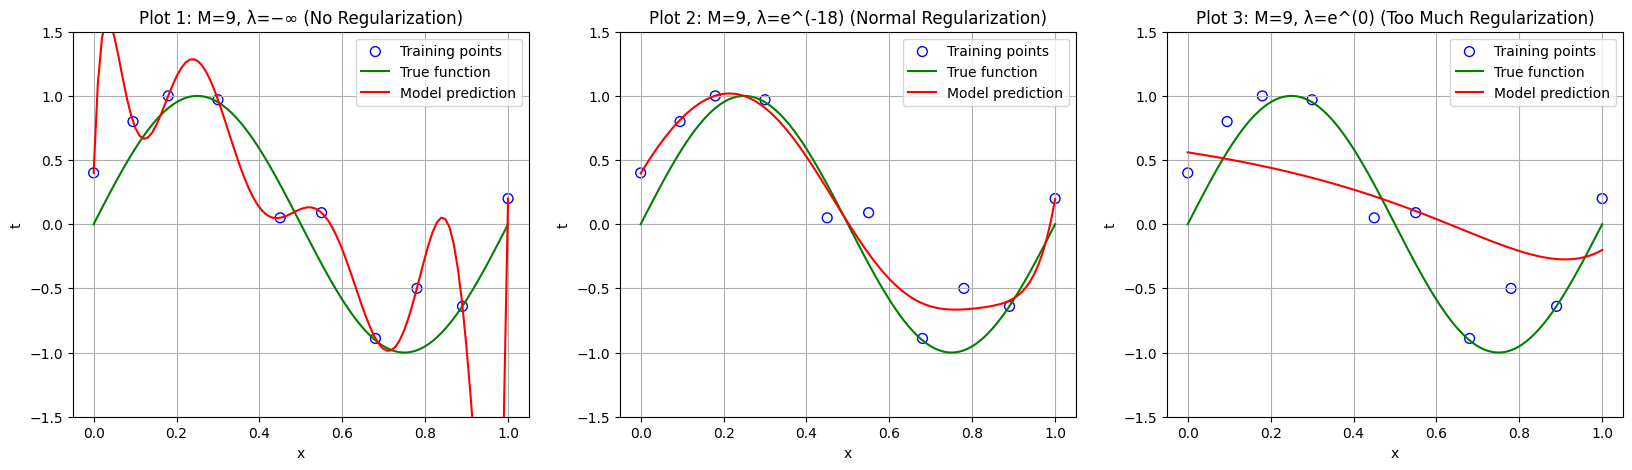

In [232]:
# Different polynomial degrees and regularization parameters
degrees = [9, 9, 9]
lambdas = [0, np.exp(-18), np.exp(0)]
titles = ["Plot 1: M=9, λ=−∞ (No Regularization)", "Plot 2: M=9, λ=e^(-18) (Normal Regularization)", "Plot 3: M=9, λ=e^(0) (Too Much Regularization)"]
line_plot = np.linspace(0, 1, 100)

# Plot settings for model predictions
plt.figure(figsize=(20, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)

    plt.scatter(x, y, edgecolor='b', s=50, facecolor='none', label="Training points")
    # plt.scatter(x_test, y_test, edgecolor='y', s=50, facecolor='none', label="Testing points")

    # Polynomial regression with Ridge regularization
    poly = PolynomialFeatures(degree=degrees[i])
    model = make_pipeline(poly, Ridge(alpha=lambdas[i]))
    model.fit(x[:, np.newaxis], y)

    # Generate prediction
    y_pred = model.predict(line_plot[:, np.newaxis])

    # Plot the data
    plt.plot(line_plot, np.sin(2 * np.pi * line_plot), color='green', label="True function")
    plt.plot(line_plot, y_pred, color='red', label="Model prediction")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title(titles[i])
    plt.legend()
    plt.grid(True)

    # Set y-axis limits to focus on the green line
    plt.ylim(-1.5, 1.5)

plt.show()

### Step 4: Plotting Training and Test Errors

In [230]:
# lambda_values = np.linspace(-35, 10, 1000)
# train_errors = []
# test_errors = []

# for log_lambda in lambda_values:
#     alpha = np.exp(log_lambda)
#     model = make_pipeline(PolynomialFeatures(degree=9), Ridge(alpha=alpha))
#     model.fit(x[:, np.newaxis], y)
    
#     y_train_pred = model.predict(x[:, np.newaxis])
#     y_test_pred = model.predict(x_test[:, np.newaxis])
    
#     train_errors.append(mean_squared_error(y, y_train_pred))
#     test_errors.append(mean_squared_error(y_test, y_test_pred))

# plt.figure()
# plt.plot(lambda_values, train_errors, label="Training", color='blue')
# plt.plot(lambda_values, test_errors, label="Test", color='red')
# plt.xlabel("ln λ")
# plt.ylabel("E_RMS")

# # Dynamic y-axis range
# y_min, y_max = 0, 1  # Set y-axis limits
# plt.ylim(y_min, y_max)

# plt.legend()
# plt.show()

0.0006352103351873966
0.23206363111905742


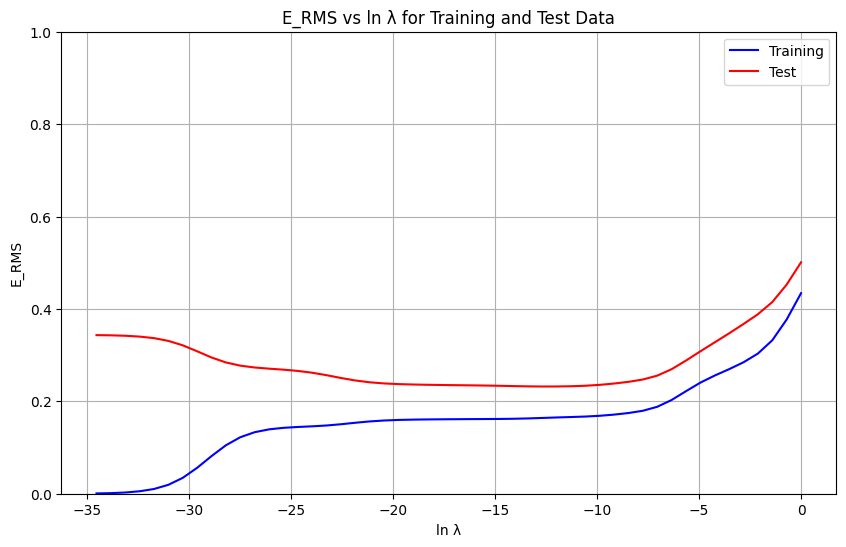

In [231]:
# Range of lambda values on a log scale
lambdas = np.logspace(-15, 0, 50)

# Store errors for training and test data
train_errors = []
test_errors = []

# Polynomial regression with Ridge regularization
degree = 9
for l in lambdas:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=l))
    model.fit(x[:, np.newaxis], y)

    y_train_pred = model.predict(x[:, np.newaxis])
    y_test_pred = model.predict(x_test[:, np.newaxis])

    train_errors.append(np.sqrt(mean_squared_error(y, y_train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plot the errors
print(min(train_errors))
print(min(test_errors))
plt.figure(figsize=(10, 6))
plt.plot(np.log(lambdas), train_errors, label='Training', color='blue')
plt.plot(np.log(lambdas), test_errors, label='Test', color='red')
plt.xlabel('ln λ')
plt.ylabel('E_RMS')
plt.title('E_RMS vs ln λ for Training and Test Data')

# Dynamic y-axis range
y_min, y_max = 0, 1  # Set y-axis limits
plt.ylim(y_min, y_max)

plt.legend()
plt.grid(True)
plt.show()